Step 1 : Importing the necesary Libraries

In [32]:
# ==============================
# Waste Classification - Setup
# ==============================

# ------------------------------
# 1️⃣ Standard Libraries
# ------------------------------
import os # Provides a way of using operating system dependent functionality
import random # Implements pseudo-random number generators for various distributions
import shutil # Offers a number of high-level operations on files and collections of files
import glob # Finds all the pathnames matching a specified pattern
import warnings # Provides the ability to issue warnings

warnings.filterwarnings('ignore') # Ignore warning messages for cleaner output

# ------------------------------
# 2️⃣ Data Handling
# ------------------------------
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # Provides high-performance, easy-to-use data structures and data analysis tools

# ------------------------------
# 3️⃣ Visualization
# ------------------------------
import matplotlib.pyplot as plt # Provides a MATLAB-like plotting framework
import matplotlib.image as mpimg # Used for reading, writing and manipulating image data
import seaborn as sns # Statistical data visualization library based on Matplotlib

# ------------------------------
# 4️⃣ Image Processing
# ------------------------------
from PIL import Image # Python Imaging Library (PIL) for opening, manipulating, and saving many different image file formats
import cv2 # OpenCV library for computer vision tasks (although not extensively used in subsequent cells, it's imported)

# ------------------------------
# 5️⃣ PyTorch for Deep Learning
# ------------------------------
import torch # The core PyTorch library for tensor computations and deep learning
import torch.nn as nn # Provides a module system for creating and managing neural networks
import torch.optim as optim # Implements various optimization algorithms
from torch.utils.data import Dataset, DataLoader # Utilities for working with data, including custom datasets and efficient batching
from torchvision import transforms, models, datasets # Provides access to popular datasets, model architectures, and image transformations for computer vision

# ------------------------------
# 6️⃣ Utilities
# ------------------------------
from tqdm import tqdm   # Provides fast, extensible progress bars for loops

# ------------------------------
# 7️⃣ Colab Specific: GPU Check
# ------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Check if a CUDA-enabled GPU is available and set the device accordingly
print(f"Device set to: {device}") # Print the device being used (GPU or CPU)

# ------------------------------
# 8️⃣ Reproducibility
# ------------------------------
SEED = 42 # Define a seed for reproducibility of results
random.seed(SEED) # Seed the Python random number generator
np.random.seed(SEED) # Seed the NumPy random number generator
torch.manual_seed(SEED) # Seed the PyTorch random number generator for CPU
if device.type == 'cuda':
    torch.cuda.manual_seed_all(SEED) # Seed the PyTorch random number generator for all GPUs if available

# ------------------------------
# 9️⃣ Display Options
# ------------------------------
sns.set(style='whitegrid', palette='muted', font_scale=1.2) # Set the style of the seaborn plots
plt.rcParams['figure.figsize'] = (10, 6) # Set the default figure size for Matplotlib plots

Device set to: cuda


Step2 : Load the dataset and print the categories



In [33]:
# Define the directory where the dataset is stored
data_dir = "data/Garbage classification/Garbage classification"  # or your actual path, e.g. "data/garbage_classification"

# List the categories (subdirectories) within the data directory
categories = os.listdir(data_dir)

# Print the identified categories
print("Categories:", categories)

Categories: ['trash', 'paper', 'metal', 'plastic', 'glass', 'cardboard']


Step3: show the few instances of the images per categories

Categories: ['trash', 'paper', 'metal', 'plastic', 'glass', 'cardboard']


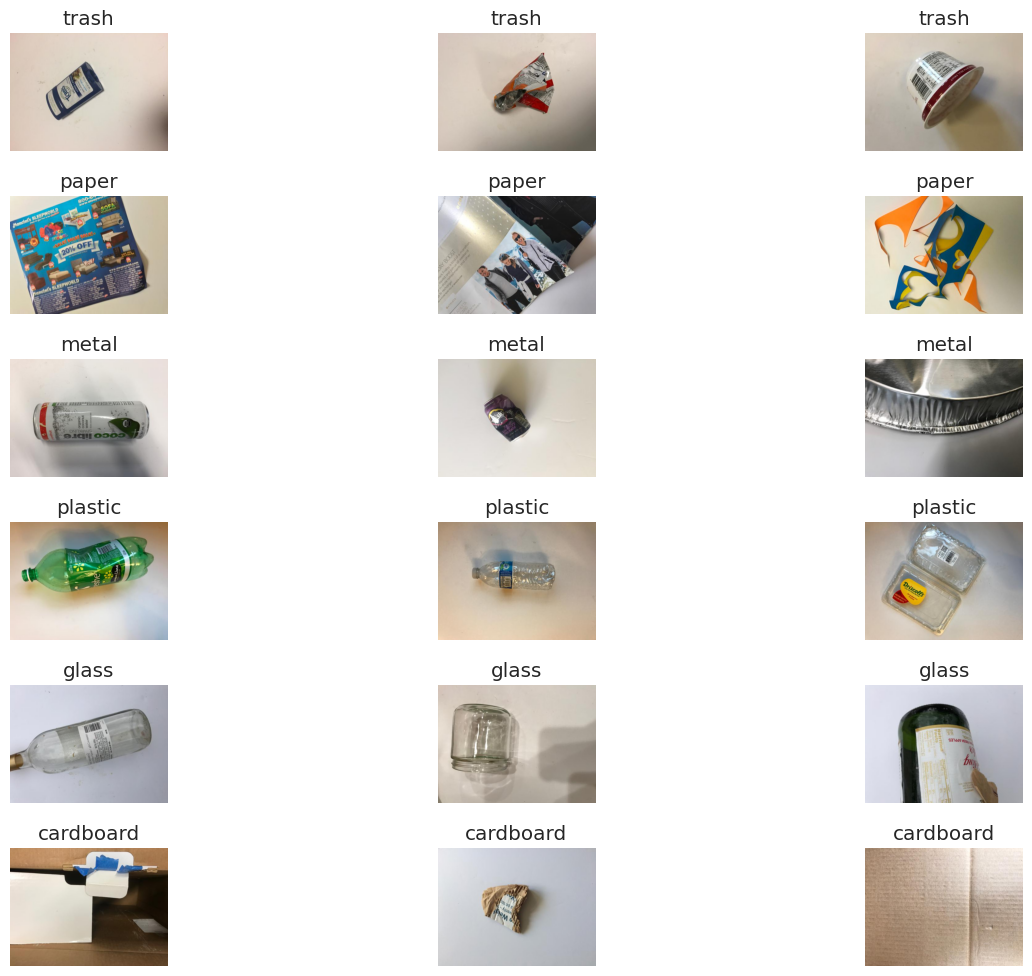

In [34]:
# Get the list of categories again (already done, but good for standalone execution)
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print("Categories:", categories)

# Number of images to display per category
num_images_to_show = 3

# Create subplots for displaying images
fig, axes = plt.subplots(len(categories), num_images_to_show, figsize=(15, 10))

# Iterate through each category
for i, category in enumerate(categories):
    category_path = os.path.join(data_dir, category)
    image_files = os.listdir(category_path)
    random.shuffle(image_files) # Shuffle images to display random samples
    display_count = min(num_images_to_show, len(image_files))  # Ensure we don't try to display more images than available

    # Display sample images for the current category
    for j in range(display_count):
        img_file = image_files[j]
        img_path = os.path.join(category_path, img_file)
        img = mpimg.imread(img_path) # Read the image using matplotlib
        axes[i, j].imshow(img) # Display the image
        axes[i, j].axis('off') # Hide the axes
        axes[i, j].set_title(category)  # Set the category as title above each image

# Adjust layout to prevent titles/labels overlapping
plt.tight_layout()
# Display the plot
plt.show()

Step4: Divide the dataset into train and test


In [35]:
from sklearn.model_selection import train_test_split
import shutil

train_dir = "train_dataset"
test_dir = "test_dataset"

# Create category folders
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

test_size = 0.2

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    train_imgs, test_imgs = train_test_split(images, test_size=test_size, random_state=42)

    # Copy train images
    for img in train_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))

    # Copy test images
    for img in test_imgs:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("Dataset split completed!")


Dataset split completed!


Step5: Count the number of dataset for each train test

In [36]:
import os

def count_images_in_split(folder):
    print(f"\nFolder: {folder}")
    classes = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    print(f"Classes: {classes}")

    total_images = 0
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        # Count only files (images)
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        total_images += num_images
        print(f"Class: {class_name} - Number of Images: {num_images}")

    print(f"Total images in {folder}: {total_images}")

# Verify the number of images in each split
print("Training Set:")
count_images_in_split('train_dataset')

print("\nTest Set:")
count_images_in_split('test_dataset')


Training Set:

Folder: train_dataset
Classes: ['trash', 'paper', 'metal', 'plastic', 'glass', 'cardboard']
Class: trash - Number of Images: 109
Class: paper - Number of Images: 475
Class: metal - Number of Images: 328
Class: plastic - Number of Images: 385
Class: glass - Number of Images: 400
Class: cardboard - Number of Images: 322
Total images in train_dataset: 2019

Test Set:

Folder: test_dataset
Classes: ['trash', 'paper', 'metal', 'plastic', 'glass', 'cardboard']
Class: trash - Number of Images: 28
Class: paper - Number of Images: 119
Class: metal - Number of Images: 82
Class: plastic - Number of Images: 97
Class: glass - Number of Images: 101
Class: cardboard - Number of Images: 81
Total images in test_dataset: 508


step7:Visualization Class distribution for each train test

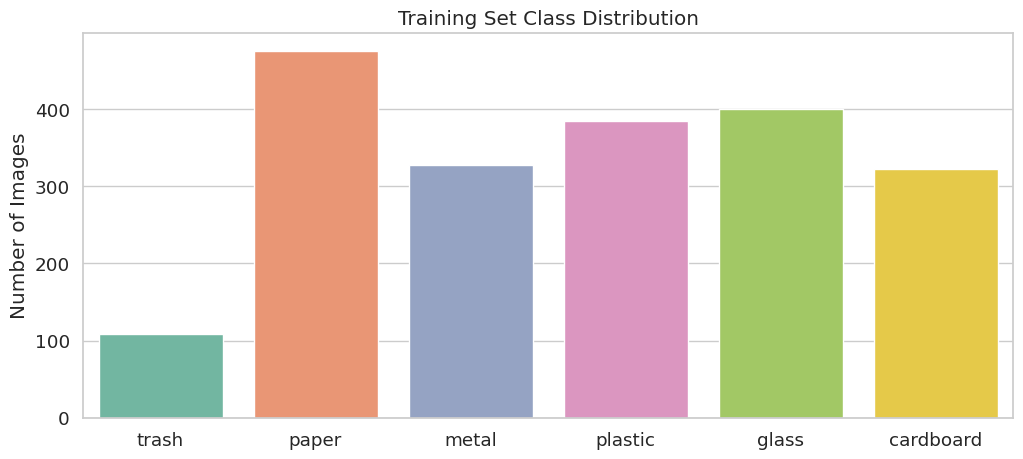

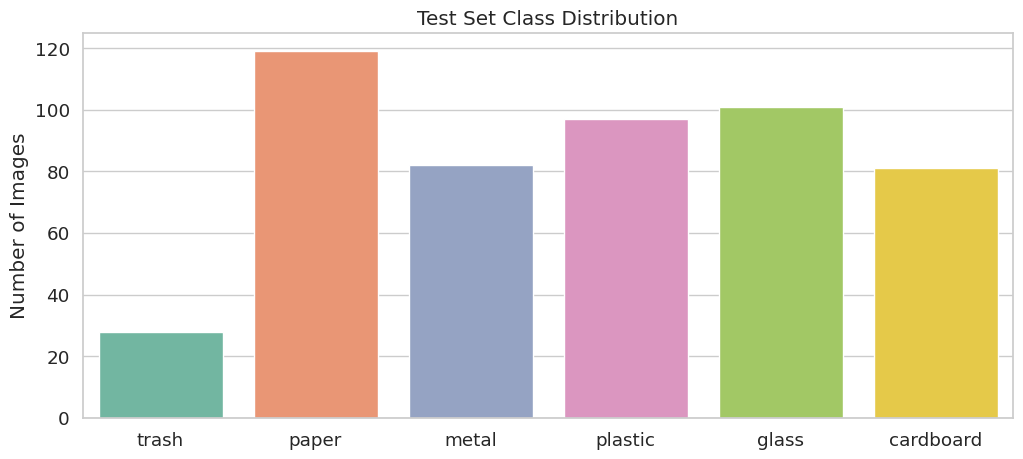

In [37]:
# Visualize class distribution
plt.figure(figsize=(12,5))

train_counts = {}
test_counts = {}

train_dir = "train_dataset"
test_dir = "test_dataset"

def get_image_counts(folder):
    counts = {}
    classes = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    for class_name in classes:
        class_path = os.path.join(folder, class_name)
        counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
    return counts

train_counts = get_image_counts(train_dir)
test_counts = get_image_counts(test_dir)


sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette='Set2')
plt.title("Training Set Class Distribution")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), palette='Set2')
plt.title("Test Set Class Distribution")
plt.ylabel("Number of Images")
plt.show()

**Insight from Class Distribution:** The bar plots clearly show the distribution of images across waste categories in both the training and test sets. There is noticeable class imbalance, with 'paper' and 'glass' having significantly more images than 'trash'. This imbalance needs to be addressed during model training to prevent bias towards majority classes.

Analyze the Image size


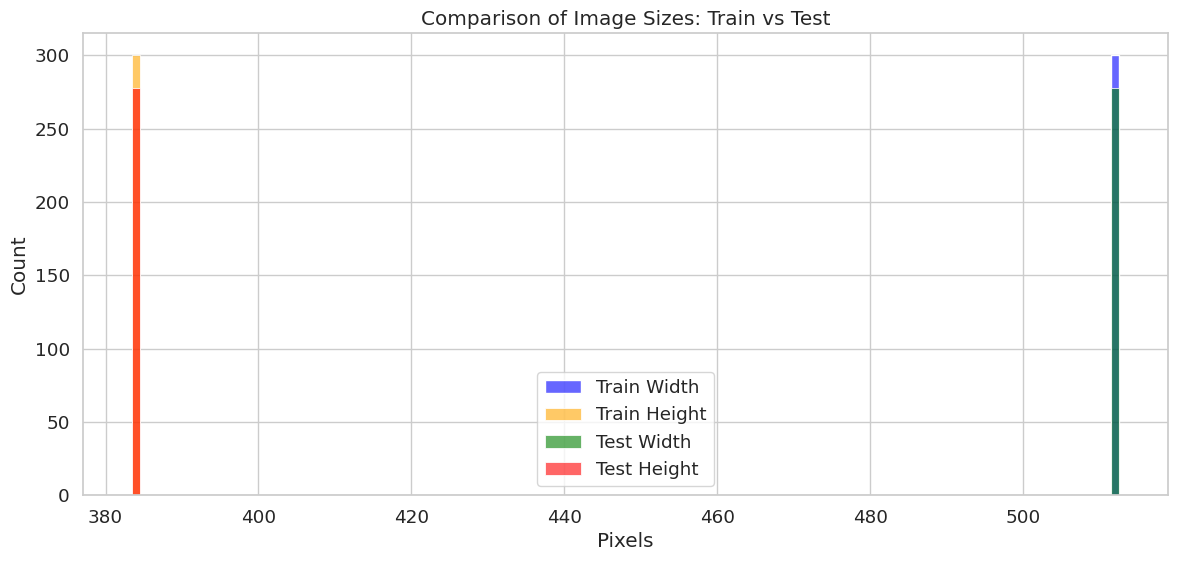

Train Set - Avg Width: 512.00, Avg Height: 384.00
Test Set  - Avg Width: 512.00, Avg Height: 384.00


In [38]:
def get_image_sizes(folder, categories, sample_size=50):
    widths, heights = [], []
    for category in categories:
        class_path = os.path.join(folder, category)
        images = os.listdir(class_path)
        for img_file in random.sample(images, min(sample_size, len(images))):
            img_path = os.path.join(class_path, img_file)
            img = Image.open(img_path)
            w, h = img.size
            widths.append(w)
            heights.append(h)
    return widths, heights

# Get sizes
train_widths, train_heights = get_image_sizes("train_dataset", categories)
test_widths, test_heights = get_image_sizes("test_dataset", categories)

# Plot combined histograms
plt.figure(figsize=(14,6))

sns.histplot(train_widths, kde=True, color='blue', label='Train Width', alpha=0.6)
sns.histplot(train_heights, kde=True, color='orange', label='Train Height', alpha=0.6)

sns.histplot(test_widths, kde=True, color='green', label='Test Width', alpha=0.6)
sns.histplot(test_heights, kde=True, color='red', label='Test Height', alpha=0.6)

plt.title("Comparison of Image Sizes: Train vs Test")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()

# Print average sizes
print(f"Train Set - Avg Width: {np.mean(train_widths):.2f}, Avg Height: {np.mean(train_heights):.2f}")
print(f"Test Set  - Avg Width: {np.mean(test_widths):.2f}, Avg Height: {np.mean(test_heights):.2f}")


**Insight from Image Size Analysis:** The analysis shows consistent image dimensions across the dataset, with average widths of approximately **512 pixels** and average heights of approximately **384 pixels** in both training and test sets. This uniformity is beneficial for model input.

## Color Channel Analysis

Analyzing the distribution of pixel intensities across the Red, Green, and Blue color channels can provide insights into the overall color composition of the images in the dataset. This can be helpful for understanding potential challenges or characteristics related to color in the classification task.

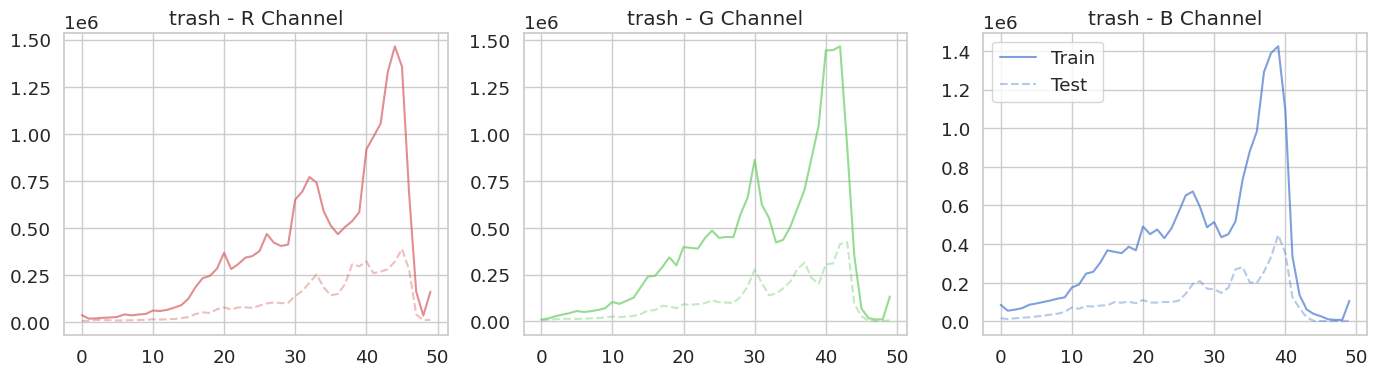

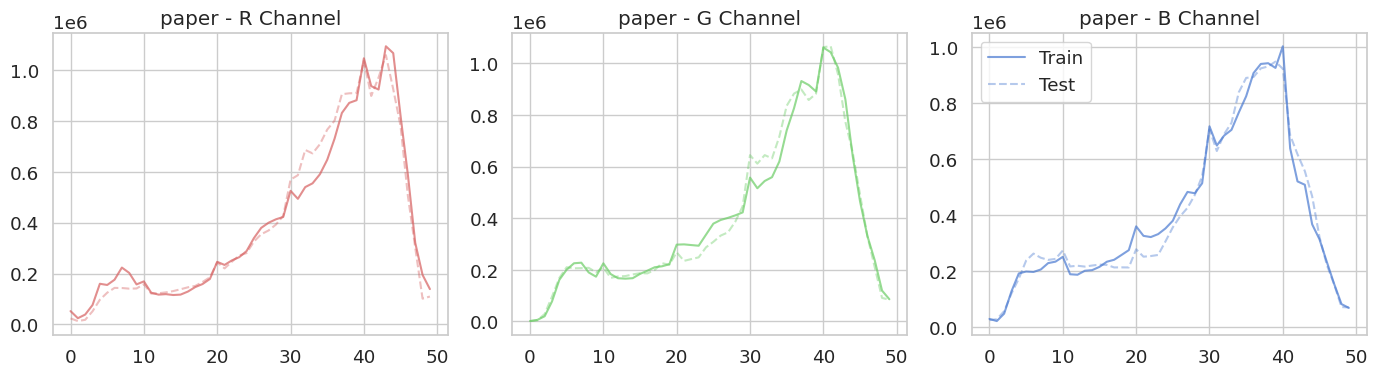

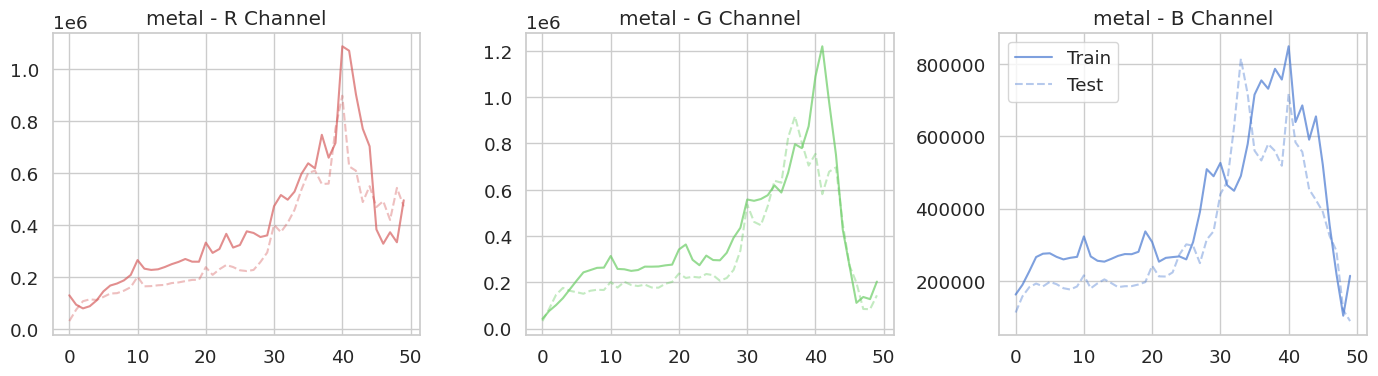

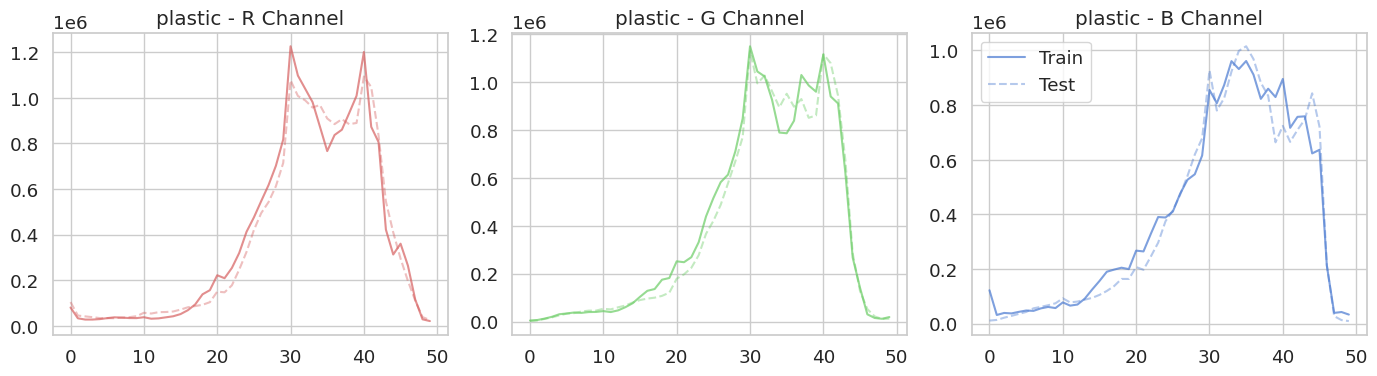

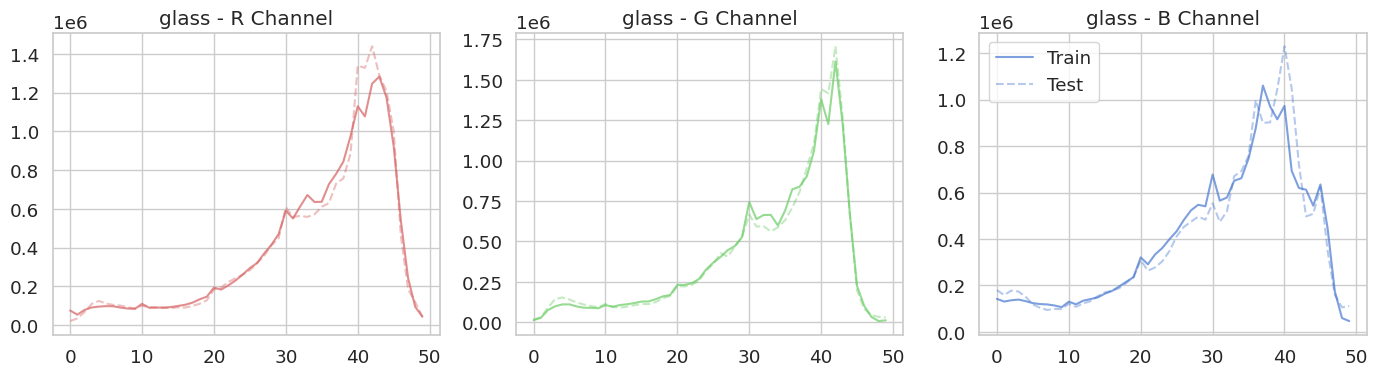

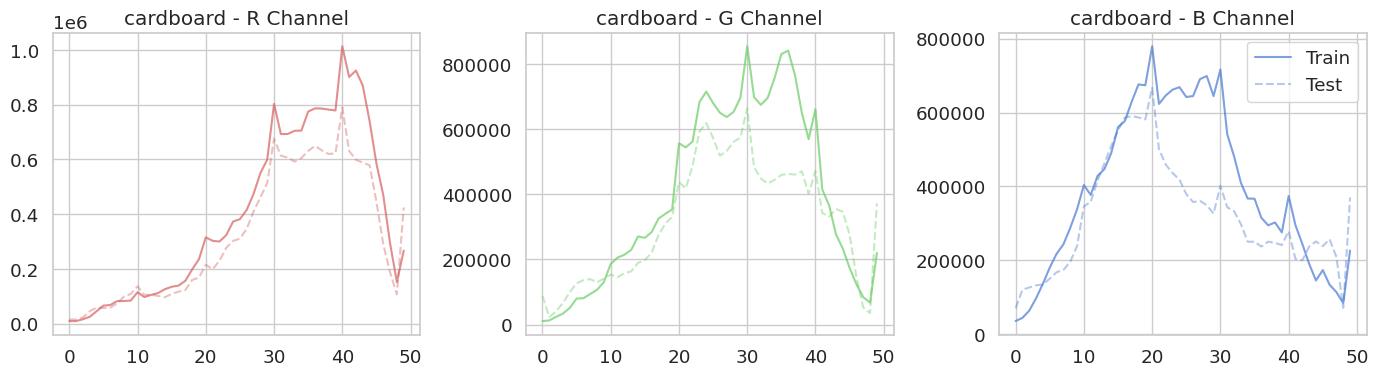

In [39]:
def plot_combined_color_histograms(train_folder, test_folder, categories, sample_size=100):


    # Helper function to get histograms per class
    def get_hist(folder):
        histograms = {}
        for category in categories:
            class_path = os.path.join(folder, category)
            images = random.sample(os.listdir(class_path), min(sample_size, len(os.listdir(class_path))))
            all_pixels = []
            for img_file in images:
                try:
                    img = np.array(Image.open(os.path.join(class_path, img_file)).convert('RGB'))
                    all_pixels.append(img)
                except:
                    continue
            if all_pixels:
                all_pixels = np.array(all_pixels)
                histograms[category] = {
                    'R': np.histogram(all_pixels[:,:,:,0].ravel(), bins=50, range=(0,255))[0],
                    'G': np.histogram(all_pixels[:,:,:,1].ravel(), bins=50, range=(0,255))[0],
                    'B': np.histogram(all_pixels[:,:,:,2].ravel(), bins=50, range=(0,255))[0]
                }
        return histograms

    train_hist = get_hist(train_folder)
    test_hist = get_hist(test_folder)

    # Plot combined
    for category in categories:
        if category not in train_hist or category not in test_hist:
            continue
        plt.figure(figsize=(14,4))
        for i, col in enumerate(['R','G','B']):
            plt.subplot(1,3,i+1)
            plt.plot(train_hist[category][col], color=col.lower(), alpha=0.7, label='Train')
            plt.plot(test_hist[category][col], color=col.lower(), alpha=0.4, linestyle='--', label='Test')
            plt.title(f"{category} - {col} Channel")
            if i==2:
                plt.legend()
        plt.tight_layout()
        plt.show()

# Usage
plot_combined_color_histograms("train_dataset", "test_dataset", categories, sample_size=100)


**Insights from Color Channel Histograms:**

Observing the combined color channel histograms (output of cell `JpIGlf7AlGx4`) provides the following insights:

- **Varied Color Compositions:** Different waste categories exhibit distinct patterns in their color channel distributions. For example, 'glass' might show different peaks compared to 'cardboard', indicating variations in their typical colors.
- **Dominant Color Ranges:** The peaks in the histograms suggest the dominant intensity ranges for each color channel within a category. A high peak near 255 in the red channel for 'plastic' might indicate the presence of many bright red plastic items.
- **Consistency Across Splits:** For most categories, the histograms for the training set (blue line) and the test set (dashed red line) closely follow each other. This indicates that the color distribution within each category is relatively consistent between the training and testing data splits, which is important for the model to generalize well.
- **Potential for Feature Extraction:** These distinct color patterns across categories suggest that color information can be a valuable feature for the classification model to differentiate between different types of garbage.

Create data frames


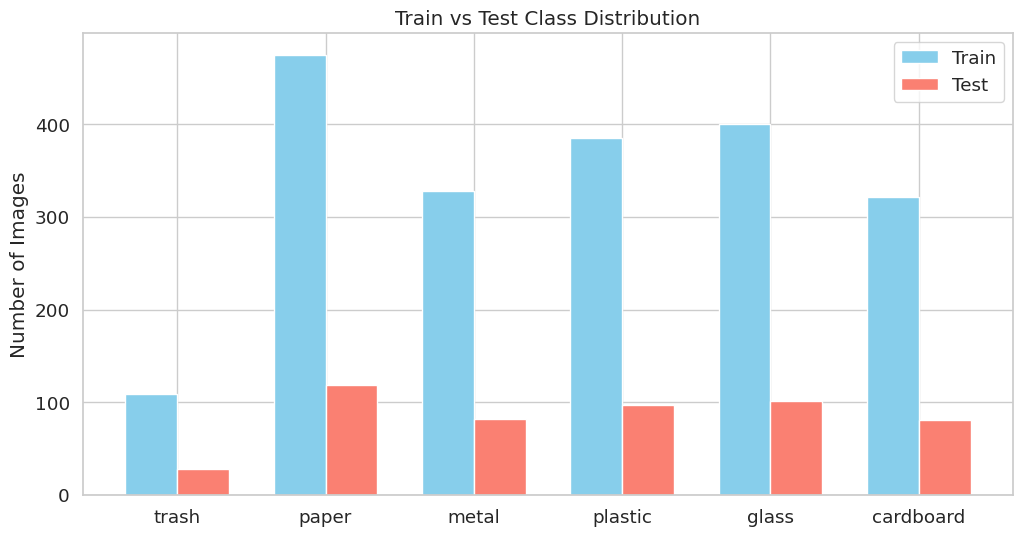

Train counts: {'trash': 109, 'paper': 475, 'metal': 328, 'plastic': 385, 'glass': 400, 'cardboard': 322}
Test counts: {'trash': 28, 'paper': 119, 'metal': 82, 'plastic': 97, 'glass': 101, 'cardboard': 81}


In [40]:
def plot_train_test_class_comparison(train_folder, test_folder, categories):
    train_counts = {}
    test_counts = {}

    for category in categories:
        train_class_path = os.path.join(train_folder, category)
        test_class_path = os.path.join(test_folder, category)

        train_counts[category] = len(os.listdir(train_class_path)) if os.path.exists(train_class_path) else 0
        test_counts[category] = len(os.listdir(test_class_path)) if os.path.exists(test_class_path) else 0

    # Combine into a DataFrame for plotting
    import pandas as pd
    df_plot = pd.DataFrame({
        'Category': categories,
        'Train': [train_counts[c] for c in categories],
        'Test': [test_counts[c] for c in categories]
    })

    # Plot side-by-side bar chart
    import numpy as np
    x = np.arange(len(categories))
    width = 0.35

    plt.figure(figsize=(12,6))
    plt.bar(x - width/2, df_plot['Train'], width, label='Train', color='skyblue')
    plt.bar(x + width/2, df_plot['Test'], width, label='Test', color='salmon')
    plt.xticks(x, categories)
    plt.ylabel("Number of Images")
    plt.title("Train vs Test Class Distribution")
    plt.legend()
    plt.show()

    print("Train counts:", train_counts)
    print("Test counts:", test_counts)

# Usage
plot_train_test_class_comparison("train_dataset", "test_dataset", categories)


In [41]:
import os
import pandas as pd
import numpy as np
from PIL import Image, UnidentifiedImageError
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_and_create_metadata(train_dir, test_dir, img_height=512, img_width=384,
                                   batch_size=32, val_split=0.2, augment=True, seed=42):
    """
    Prepares train, validation, and test generators AND creates a metadata DataFrame.
    """

    # --------------------------
    # 1️⃣ Create Image Generators
    # --------------------------
    if augment:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest',
            validation_split=val_split
        )
    else:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            validation_split=val_split
        )

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        seed=seed
    )

    val_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        seed=seed
    )

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    class_indices = train_generator.class_indices

    # --------------------------
    # 2️⃣ Create Metadata DataFrame
    # --------------------------
    def create_metadata(folder, split_name):
        records = []
        for class_name in os.listdir(folder):
            class_path = os.path.join(folder, class_name)
            if not os.path.isdir(class_path):
                continue
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                width, height, mode = None, None, None
                corrupted = False
                try:
                    img = Image.open(img_path)
                    width, height = img.size
                    mode = img.mode
                except (UnidentifiedImageError, OSError):
                    corrupted = True
                records.append({
                    'image_path': img_path,
                    'label': class_name,
                    'split': split_name,
                    'width': width,
                    'height': height,
                    'mode': mode,
                    'corrupted': corrupted
                })
        return records

    # Collect metadata
    metadata = []
    metadata += create_metadata(train_dir, "train")
    metadata += create_metadata(test_dir, "test")

    # Split train metadata into train/val based on validation split
    if val_split > 0:
        from sklearn.model_selection import train_test_split
        train_meta = [m for m in metadata if m['split']=='train']
        train_meta, val_meta = train_test_split(train_meta, test_size=val_split, random_state=seed, stratify=[m['label'] for m in train_meta])
        for m in train_meta:
            m['split'] = 'train'
        for m in val_meta:
            m['split'] = 'val'
        metadata = train_meta + val_meta + [m for m in metadata if m['split']=='test']

    df_metadata = pd.DataFrame(metadata)

    return train_generator, val_generator, test_generator, class_indices, df_metadata

# --------------------------
# Usage Example
# --------------------------
train_dir = "train_dataset"
test_dir = "test_dataset"

train_gen, val_gen, test_gen, class_indices, df_metadata = preprocess_and_create_metadata(
    train_dir, test_dir,
    img_height=512, img_width=384,
    batch_size=32,
    val_split=0.2,
    augment=True
)

# --------------------------
# Quick EDA Checks
# --------------------------
print("Class indices:", class_indices)
print("\nMetadata DataFrame Sample:")
print(df_metadata.head())

print("\nClass Distribution:")
print(df_metadata['label'].value_counts())

print("\nSplit Distribution:")
print(df_metadata['split'].value_counts())

print("\nCorrupted Images:", df_metadata['corrupted'].sum())


Found 1617 images belonging to 6 classes.
Found 402 images belonging to 6 classes.
Found 508 images belonging to 6 classes.
Class indices: {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

Metadata DataFrame Sample:
                             image_path    label  split  width  height mode  \
0      train_dataset/paper/paper408.jpg    paper  train    512     384  RGB   
1  train_dataset/plastic/plastic448.jpg  plastic  train    512     384  RGB   
2       train_dataset/glass/glass94.jpg    glass  train    512     384  RGB   
3      train_dataset/glass/glass145.jpg    glass  train    512     384  RGB   
4       train_dataset/paper/paper50.jpg    paper  train    512     384  RGB   

   corrupted  
0      False  
1      False  
2      False  
3      False  
4      False  

Class Distribution:
label
paper        594
glass        501
plastic      482
metal        410
cardboard    403
trash        137
Name: count, dtype: int64

Split Distribution:
split
train  

In [42]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/test_dataset /content/drive/MyDrive/


Mounted at /content/drive


In [44]:
!cp -r /content/train_dataset /content/drive/MyDrive/
